In [34]:
%%script echo skipping
# Initialize Otter
import otter
grader = otter.Notebook("lab02.ipynb")

skipping


In [35]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
%cd /content/drive/MyDrive/Github/dsKal100

/content/drive/MyDrive/Github/dsKal100


In [37]:
!ls
%cd lab/lab02/
!ls

 cs-231n-python-colab.ipynb   lec
 disc			      other
 grad_proj		      proj
 hw			     'python-tutorial for cs231n Stanford.ipynb'
 lab			      README.md
/content/drive/MyDrive/Github/dsKal100/lab/lab02
data  lab02.ipynb  tests


## Lab 2: Pandas Overview

To receive credit for a lab, answer all questions correctly and submit before the deadline.

**This lab is due  Tuesday, Feb 1st at 11:59 PM.**

### Lab Walk-Through

In addition to the lab notebook, we have also released a prerecorded walk-through video of the lab. We encourage you to reference this video as you work through the lab. Run the cell below to display the video.

In [38]:
%%script echo skipping
from IPython.display import YouTubeVideo
YouTubeVideo("MLUNk_D7KW0", list = 'PLQCcNQgUcDfoWO3WVtznI7CBJmtNUqbAN', listType = 'playlist')

skipping


### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below. (That's a good way to learn your classmates' names.)

**Collaborators**: *list collaborators here*

---
[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this lab, you will review commonly used data wrangling operations/tools in Pandas. We aim to give you familiarity with:

* Creating DataFrames
* Slicing DataFrames (i.e. selecting rows and columns)
* Filtering data (using boolean arrays and groupby.filter)
* Aggregating (using groupby.agg)

In this lab you are going to use several pandas methods. Reminder from lecture that you may press `shift+tab` on method parameters to see the documentation for that method. For example, if you were using the `drop` method in pandas, you couold press shift+tab to see what `drop` is expecting.

Pandas is very similar to the datascience library that you saw in Data 8. This [conversion notebook](https://github.com/data-8/materials-x19/blob/master/reference/Datascience%20to%20Pandas%20Conversion%20Notebook.ipynb) may serve as a useful guide!

This lab expects that you have watched the pandas lectures. If you have not, this lab will probably take a very long time.

**Note**: The Pandas interface is notoriously confusing for beginners, and the documentation is not consistently great. Throughout the semester, you will have to search through Pandas documentation and experiment, but remember it is part of the learning experience and will help shape you as a data scientist!

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
%matplotlib inline

## Creating DataFrames & Basic Manipulations

Recall that a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) is a table in which each column has a specific data type; there is an index over the columns (typically string labels) and an index over the rows (typically ordinal numbers).

Usually you'll create DataFrames by using a function like `pd.read_csv`. However, in this section, we'll discuss how to create them from scratch.

The [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for the pandas `DataFrame` class provides several constructors for the DataFrame class.

**Syntax 1:** You can create a DataFrame by specifying the columns and values using a dictionary as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [40]:
fruit_info = pd.DataFrame(
    data = {'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink'],
          'price': [1.0, 0.75, 0.35, 0.05]
          })
fruit_info

,fruit,color,price
0,apple,red,1.00
1,orange,orange,0.75
2,banana,yellow,0.35
3,raspberry,pink,0.05


**Syntax 2:** You can also define a DataFrame by specifying the rows as shown below. 

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [41]:
fruit_info2 = pd.DataFrame(
    [("red", "apple", 1.0), ("orange", "orange", 0.75), ("yellow", "banana", 0.35),
     ("pink", "raspberry", 0.05)], 
    columns = ["color", "fruit", "price"])
fruit_info2

,color,fruit,price
0,red,apple,1.00
1,orange,orange,0.75
2,yellow,banana,0.35
3,pink,raspberry,0.05


You can obtain the dimensions of a DataFrame by using the shape attribute `DataFrame.shape`.

In [42]:
fruit_info.shape

(4, 3)

In [43]:
fruit_info.size

12

You can also convert the entire DataFrame into a two-dimensional NumPy array.

In [44]:
fruit_info.values

array([['apple', 'red', 1.0],
       ['orange', 'orange', 0.75],
       ['banana', 'yellow', 0.35],
       ['raspberry', 'pink', 0.05]], dtype=object)

There are other constructors but we do not discuss them here.

### REVIEW: Selecting Rows and Columns in Pandas

As you've seen in lecture and discussion, there are two verbose operators in Python for selecting rows: `loc` and `iloc`. Let's review them briefly.

#### Approach 1: `loc`

The first of the two verbose operators is `loc`, which takes two arguments. The first is one or more row **labels**, the second is one or more column **labels**.

The desired rows or columns can be provided individually, in slice notation, or as a list. Some examples are given below.

Note that **slicing in `loc` is inclusive** on the provided labels.

In [45]:
#get rows 0 through 2 and columns fruit through price
fruit_info.loc[0:2, 'fruit':'price']

,fruit,color,price
0,apple,red,1.00
1,orange,orange,0.75
2,banana,yellow,0.35


In [46]:
# get rows 0 through 2 and columns fruit and price. 
# Note the difference in notation and result from the previous example.
fruit_info.loc[0:2, ['fruit', 'price']]

,fruit,price
0,apple,1.00
1,orange,0.75
2,banana,0.35


In [47]:
# get rows 0 and 2 and columns fruit and price. 
fruit_info.loc[[0, 2], ['fruit', 'price']]

,fruit,price
0,apple,1.00
2,banana,0.35


In [48]:
# get rows 0 and 2 and column fruit
fruit_info.loc[[0, 2], ['fruit']]

,fruit
0,apple
2,banana


Note that if we request a single column but don't enclose it in a list, the return type of the `loc` operator is a `Series` rather than a DataFrame. 

In [49]:
# get rows 0 and 2 and column fruit, returning the result as a Series
fruit_info.loc[[0, 2], 'fruit']

0     apple
2    banana
Name: fruit, dtype: object

In [50]:
fruit_info.loc[[0,2], 'fruit'].values

np.array([1,2])

array([1, 2])

If we provide only one argument to `loc`, it uses the provided argument to select rows, and returns all columns.

In [51]:
fruit_info.loc[0:1]

,fruit,color,price
0,apple,red,1.00
1,orange,orange,0.75


Note that if you try to access columns without providing rows, `loc` will crash. 

In [52]:
# uncomment, this code will crash
#fruit_info.loc[["fruit", "price"]]

# uncomment, this code works fine: 
fruit_info.loc[:, ["fruit", "price"]]

,fruit,price
0,apple,1.00
1,orange,0.75
2,banana,0.35
3,raspberry,0.05


#### Approach 2: `iloc`

`iloc` is very similar to `loc` except that its arguments are row numbers and column numbers, rather than row labels and labels names. A usueful mnemonic is that the `i` stands for "integer".

In addition, **slicing for `iloc` is exclusive** on the provided integer indices. Some examples are given below:

In [53]:
# get rows 0 through 3 (exclusive) and columns 0 through 2 (exclusive)
fruit_info.iloc[0:3, 0:3]

,fruit,color,price
0,apple,red,1.00
1,orange,orange,0.75
2,banana,yellow,0.35


In [54]:
# get rows 0 through 3 (exclusive) and columns 0 and 2.
fruit_info.iloc[0:3, [0, 2]]

,fruit,price
0,apple,1.00
1,orange,0.75
2,banana,0.35


In [55]:
# get rows 0 and 2 and columns 0 and 2.
fruit_info.iloc[[0, 2], [0, 2]]

,fruit,price
0,apple,1.00
2,banana,0.35


In [56]:
#get rows 0 and 2 and column fruit
fruit_info.iloc[[0, 2], [0]]

,fruit
0,apple
2,banana


In [57]:
# get rows 0 and 2 and column fruit
fruit_info.iloc[[0, 2], 0]

0     apple
2    banana
Name: fruit, dtype: object

Note that in these loc and iloc examples above, the row **label** and row **number** were always the same.

Let's see an example where they are different. If we sort our fruits by color, we get:

In [58]:
fruit_info_sorted = fruit_info.sort_values("price")
fruit_info_sorted

,fruit,color,price
3,raspberry,pink,0.05
2,banana,yellow,0.35
1,orange,orange,0.75
0,apple,red,1.00


Observe that the row number 0 now has index 3, row number 1 now has index 2, etc. These indices are the arbitrary numerical index generated when we created the DataFrame. For example, banana was originally in row 2, and so it has row label 2.

If we request the rows in positions 0 and 2 using `iloc`, we're indexing using the row NUMBERS, not labels. 

In [59]:
fruit_info_sorted.iloc[[0, 2], 0]

3    raspberry
1       orange
Name: fruit, dtype: object

Lastly, similar to with `loc`, the second argument to `iloc` is optional. That is, if you provide only one argument to `iloc`, it treats the argument you provide as a set of desired row numbers, not column numbers.

In [60]:
fruit_info.iloc[[0, 2]]

,fruit,color,price
0,apple,red,1.00
2,banana,yellow,0.35


#### Approach 3: `[]` Notation for Accessing Rows and Columns

Pandas also supports a bare `[]` operator. It's similar to `loc` in that it lets you access rows and columns by their name.

However, unlike `loc`, which takes row names and also optionally column names, `[]` is more flexible. If you provde it only row names, it'll give you rows (same behavior as `loc`), and if you provide it with only column names, it'll give you columns (whereas `loc` will crash).

Some examples:

In [61]:
fruit_info[0:2]

,fruit,color,price
0,apple,red,1.00
1,orange,orange,0.75


In [62]:
# Here we're providing a list of fruits as single argument to []
fruit_info[["fruit", "color", "price"]]

,fruit,color,price
0,apple,red,1.00
1,orange,orange,0.75
2,banana,yellow,0.35
3,raspberry,pink,0.05


Note that slicing notation is not supported for columns if you use `[]` notation. Use `loc` instead.

In [63]:
# uncomment and this code crashes
#fruit_info["fruit":"price"]

# uncomment and this works fine
fruit_info.loc[:, "fruit":"price"]

,fruit,color,price
0,apple,red,1.00
1,orange,orange,0.75
2,banana,yellow,0.35
3,raspberry,pink,0.05


`[]` and `loc` are quite similar. For example, the following two pieces of code are functionally equivalent for selecting the fruit and price columns.

1. `fruit_info[["fruit", "price"]]` 
2. `fruit_info.loc[:, ["fruit", "price"]]`.

Because it yields more concise code, you'll find that our code and your code both tend to feature `[]`. However, there are some subtle pitfalls of using `[]`. If you're ever having performance issues, weird behavior, or you see a `SettingWithCopyWarning` in pandas, switch from `[]` to `loc` and this may help.

To avoid getting too bogged down in indexing syntax, we'll avoid a more thorough discussion of `[]` and `loc`. We may return to this at a later point in the course.

For more on `[]` vs `loc`, you may optionally try reading:
1. https://stackoverflow.com/questions/48409128/what-is-the-difference-between-using-loc-and-using-just-square-brackets-to-filte
2. https://stackoverflow.com/questions/38886080/python-pandas-series-why-use-loc/65875826#65875826
3. https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas/53954986#53954986

Now that we've reviewed basic indexing, let's discuss how we can modify dataframes. We'll do this via a series of exercises. 

### Question 1(a)

For a DataFrame `d`, you can add a column with `d['new column name'] = ...` and assign a list or array of values to the column. Add a column of integers containing 1, 2, 3, and 4 called `rank1` to the `fruit_info` table which expresses your personal preference about the taste ordering for each fruit (1 is tastiest; 4 is least tasty). 

<!--
BEGIN QUESTION
name: q1a
-->

In [64]:
fruit_info["rank1"] = [2,1,0,3]
fruit_info

,fruit,color,price,rank1
0,apple,red,1.00,2
1,orange,orange,0.75,1
2,banana,yellow,0.35,0
3,raspberry,pink,0.05,3


### Question 1(b)

You can also add a column to `d` with `d.loc[:, 'new column name'] = ...`. As above, the first parameter is for the rows and second is for columns. The `:` means change all rows and the `'new column name'` indicates the name of the column you are modifying (or in this case, adding). 

Add a column called `rank2` to the `fruit_info` table which contains the same values in the same order as the `rank1` column.

<!--
BEGIN QUESTION
name: q1b
-->

In [65]:
fruit_info.loc[:,"rank2"] = [2,1,0,3]
fruit_info

,fruit,color,price,rank1,rank2
0,apple,red,1.00,2,2
1,orange,orange,0.75,1,1
2,banana,yellow,0.35,0,0
3,raspberry,pink,0.05,3,3


### Question 2

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) both the `rank1` and `rank2` columns you created. Make sure to use the `axis` parameter correctly. Note that `drop` does not change a table, but instead returns a new table with fewer columns or rows unless you set the optional `inplace` parameter.

*Hint*: Look through the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) to see how you can drop multiple columns of a Pandas DataFrame at once using a list of column names.

<!--
BEGIN QUESTION
name: q2
-->

In [66]:
fruit_info_original = fruit_info.drop(["rank1", "rank2"], axis = 1)
#option 2, which i like better
fruit_info_original = fruit_info.drop(columns = ["rank1", "rank2"])
fruit_info_original

,fruit,color,price
0,apple,red,1.00
1,orange,orange,0.75
2,banana,yellow,0.35
3,raspberry,pink,0.05


### Question 3

Use the `.rename()` method to [rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) the columns of `fruit_info_original` so they begin with capital letters. Set this new DataFrame to `fruit_info_caps`. For an example of how to use rename, see the linked documentation above.
<!--
BEGIN QUESTION
name: q3
-->

In [67]:
fruit_info_caps = fruit_info_original.rename(columns={"fruit":"Fruit", "color":"Color", "price":"Price"})

#option 2, using title() to create title case
fruit_info_caps = fruit_info_original.rename(str.title, axis = 'columns')
fruit_info_caps

,Fruit,Color,Price
0,apple,red,1.00
1,orange,orange,0.75
2,banana,yellow,0.35
3,raspberry,pink,0.05


### Babynames Dataset
For the new few questions of this lab, let's move on to a real world dataset. We'll be using the babynames dataset from Lecture 1. The babynames dataset contains a record of the given names of babies born in the United States each year.

First let's run the following cells to build the DataFrame `baby_names`.
The cells below download the data from the web and extract the data into a DataFrame. There should be a total of 6215834 records.

### `fetch_and_cache` Helper

The following function downloads and caches data in the `data/` directory and returns the `Path` to the downloaded file. The cell below the function describes how it works. You are not expected to understand this code, but you may find it useful as a reference as a practitioner of data science after the course. 

In [68]:
import requests
from pathlib import Path

def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path to the file.
    """
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
    else:
        import time 
        created = time.ctime(file_path.stat().st_ctime)
        print("Using cached version downloaded at", created)
    return file_path

In Python, a `Path` object represents the filesystem paths to files (and other resources). The `pathlib` module is effective for writing code that works on different operating systems and filesystems. 

To check if a file exists at a path, use `.exists()`. To create a directory for a path, use `.mkdir()`. To remove a file that might be a [symbolic link](https://en.wikipedia.org/wiki/Symbolic_link), use `.unlink()`. 

This function creates a path to a directory that will contain data files. It ensures that the directory exists (which is required to write files in that directory), then proceeds to download the file based on its URL.

The benefit of this function is that not only can you force when you want a new file to be downloaded using the `force` parameter, but in cases when you don't need the file to be re-downloaded, you can use the cached version and save download time.

Below we use `fetch_and_cache` to download the `namesbystate.zip` zip file, which is a compressed directory of CSV files. 

**This might take a little while! Consider stretching.**

In [69]:
data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
namesbystate_path = fetch_and_cache(data_url, 'namesbystate.zip')

Using cached version downloaded at Sat Dec 10 23:20:01 2022


The following cell builds the final full `baby_names` DataFrame. It first builds one DataFrame per state, because that's how the data are stored in the zip file. Here is documentation for [pd.concat](https://pandas.pydata.org/pandas-docs/version/1.2/reference/api/pandas.concat.html) if you want to know more about its functionality. As before, you are not expected to understand this code. 

In [70]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')

column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=column_labels)

states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

baby_names = states[0]
for state_df in states[1:]:
    baby_names = pd.concat([baby_names, state_df])
baby_names = baby_names.reset_index().iloc[:, 1:]

In [71]:
len(baby_names)

6215834

In [72]:
baby_names.head()

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


### Selection Examples on Baby Names

As with our synthetic fruit dataset, we can use `loc` and `iloc` to select rows and columns of interest from our dataset.

In [73]:
baby_names.loc[2:5, 'Name']

2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

Notice the difference between the following cell and the previous one, just passing in `'Name'` returns a Series while `['Name']` returns a DataFrame.

In [74]:
baby_names.loc[2:5, ['Name']]

,Name
2,Anna
3,Margaret
4,Helen
5,Elsie


The code below collects the rows in positions 1 through 3, and the column in position 3 ("Name").

In [75]:
baby_names.iloc[1:4, [3]]

,Name
1,Annie
2,Anna
3,Margaret


### Question 4

Use `.loc` to select `Name` and `Year` **in that order** from the `baby_names` table.

<!--
BEGIN QUESTION
name: q4
-->

In [76]:
name_and_year = baby_names.loc[:,["Name","Year"]]
name_and_year[:5]

,Name,Year
0,Mary,1910
1,Annie,1910
2,Anna,1910
3,Margaret,1910
4,Helen,1910


Now repeat the same selection using the plain `[]` notation.

In [77]:
name_and_year = baby_names[["Name","Year"]]
name_and_year[:5]

,Name,Year
0,Mary,1910
1,Annie,1910
2,Anna,1910
3,Margaret,1910
4,Helen,1910


## Filtering Data

### Review: Filtering with boolean arrays

Filtering is the process of removing unwanted material.  In your quest for cleaner data, you will undoubtedly filter your data at some point: whether it be for clearing up cases with missing values, for culling out fishy outliers, or for analyzing subgroups of your data set.  Example usage looks like `df[df['column name'] < 5]`.

For your reference, some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
&gt;=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

In the following we construct the DataFrame containing only names registered in California

In [78]:
ca = baby_names[baby_names['State'] == 'CA']
#option 2, easier to read
ca = baby_names.query("State == 'CA'")
ca.head(5)

,State,Sex,Year,Name,Count
390635,CA,F,1910,Mary,295
390636,CA,F,1910,Helen,239
390637,CA,F,1910,Dorothy,220
390638,CA,F,1910,Margaret,163
390639,CA,F,1910,Frances,134


### Question 5
Using a boolean array, select the names in Year 2000 (from `baby_names`) that have larger than 3000 counts. Keep all columns from the original `baby_names` DataFrame.

Note: Note that compound expressions have to be grouped with parentheses. That is, any time you use `p & q` to filter the DataFrame, make sure to use `df[(df[p]) & (df[q])]` or `df.loc[(df[p]) & (df[q])]`. 

You may use either `[]` or `loc`. Both will achieve the same result. For more on `[]` vs. `loc` see the stack overflow links from the intro portion of this lab.

<!--
BEGIN QUESTION
name: q5
-->

In [79]:
result = baby_names[(baby_names["Year"] == 2000) & (baby_names["Count"] > 3000)]
result.head()

,State,Sex,Year,Name,Count
725638,CA,M,2000,Daniel,4342
725639,CA,M,2000,Anthony,3839
725640,CA,M,2000,Jose,3804
725641,CA,M,2000,Andrew,3600
725642,CA,M,2000,Michael,3572


#### Query Review

Recall that pandas also has a query command. For example, we can get California baby names with the code below.

In [80]:
ca = baby_names.query('State == "CA"')
ca.head(5)

,State,Sex,Year,Name,Count
390635,CA,F,1910,Mary,295
390636,CA,F,1910,Helen,239
390637,CA,F,1910,Dorothy,220
390638,CA,F,1910,Margaret,163
390639,CA,F,1910,Frances,134


Using the `query` command, select the names in Year 2000 (from `baby_names`) that have larger than 3000 counts.

In [81]:
result_using_query = baby_names.query("Year == 2000 and Count > 3000")
result_using_query.head(5)

,State,Sex,Year,Name,Count
725638,CA,M,2000,Daniel,4342
725639,CA,M,2000,Anthony,3839
725640,CA,M,2000,Jose,3804
725641,CA,M,2000,Andrew,3600
725642,CA,M,2000,Michael,3572


## Groupby

Let's now turn to using groupby from lecture 4.

**Note:** This [slide](https://docs.google.com/presentation/d/1FC-cs5MTGSkDzI_7R_ZENgwoHQ4aVamxFOpJuWT0fo0/edit#slide=id.g477ed0f02e_0_390) provides a visual picture of how `groupby.agg` works if you'd like a reference.

### Question 6: Elections

**Review**: Let's start by reading in the election dataset from the pandas lectures.

In [82]:
# run this cell
elections = pd.read_csv("data/elections.csv")
elections.head(5)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


As we saw, we can groupby a specific column, e.g. "Party". It turns out that using some syntax we didn't cover in lecture, we can print out the subframes that result. This isn't something you'll do for any practical purpose. However, it may help you get an understanding of what groupby is actually doing.

An example is given below for elections since 1980.

In [83]:
# run this cell
for n, g in elections.query("Year >= 1980").groupby("Party"):
    print(f"Name: {n}") # by the way this is an "f string", a relatively new and great feature of Python
    display(g)

Name: Citizens


,Year,Candidate,Party,Popular vote,Result,%
127,1980,Barry Commoner,Citizens,233052,loss,0.270182


Name: Constitution


,Year,Candidate,Party,Popular vote,Result,%
160,2004,Michael Peroutka,Constitution,143630,loss,0.117542
164,2008,Chuck Baldwin,Constitution,199750,loss,0.152398
172,2016,Darrell Castle,Constitution,203091,loss,0.149640


Name: Democratic


,Year,Candidate,Party,Popular vote,Result,%
129,1980,Jimmy Carter,Democratic,35480115,loss,41.132848
134,1984,Walter Mondale,Democratic,37577352,loss,40.729429
137,1988,Michael Dukakis,Democratic,41809074,loss,45.770691
140,1992,Bill Clinton,Democratic,44909806,win,43.118485
144,1996,Bill Clinton,Democratic,47400125,win,49.296938
151,2000,Al Gore,Democratic,50999897,loss,48.491813
158,2004,John Kerry,Democratic,59028444,loss,48.306775
162,2008,Barack Obama,Democratic,69498516,win,53.023510
168,2012,Barack Obama,Democratic,65915795,win,51.258484
176,2016,Hillary Clinton,Democratic,65853514,loss,48.521539


Name: Green


,Year,Candidate,Party,Popular vote,Result,%
149,1996,Ralph Nader,Green,685297,loss,0.712721
155,2000,Ralph Nader,Green,2882955,loss,2.741176
156,2004,David Cobb,Green,119859,loss,0.098088
165,2008,Cynthia McKinney,Green,161797,loss,0.123442
170,2012,Jill Stein,Green,469627,loss,0.365199
177,2016,Jill Stein,Green,1457226,loss,1.073699
181,2020,Howard Hawkins,Green,405035,loss,0.255731


Name: Independent


,Year,Candidate,Party,Popular vote,Result,%
130,1980,John B. Anderson,Independent,5719850,loss,6.631143
143,1992,Ross Perot,Independent,19743821,loss,18.956298
161,2004,Ralph Nader,Independent,465151,loss,0.380663
167,2008,Ralph Nader,Independent,739034,loss,0.563842
174,2016,Evan McMullin,Independent,732273,loss,0.539546


Name: Libertarian


,Year,Candidate,Party,Popular vote,Result,%
128,1980,Ed Clark,Libertarian,921128,loss,1.067883
132,1984,David Bergland,Libertarian,228111,loss,0.247245
138,1988,Ron Paul,Libertarian,431750,loss,0.472660
139,1992,Andre Marrou,Libertarian,290087,loss,0.278516
146,1996,Harry Browne,Libertarian,485759,loss,0.505198
153,2000,Harry Browne,Libertarian,384431,loss,0.365525
159,2004,Michael Badnarik,Libertarian,397265,loss,0.325108
163,2008,Bob Barr,Libertarian,523715,loss,0.399565
169,2012,Gary Johnson,Libertarian,1275971,loss,0.992241
175,2016,Gary Johnson,Libertarian,4489235,loss,3.307714


Name: Natural Law


,Year,Candidate,Party,Popular vote,Result,%
148,1996,John Hagelin,Natural Law,113670,loss,0.118219


Name: New Alliance


,Year,Candidate,Party,Popular vote,Result,%
136,1988,Lenora Fulani,New Alliance,217221,loss,0.237804


Name: Populist


,Year,Candidate,Party,Popular vote,Result,%
141,1992,Bo Gritz,Populist,106152,loss,0.101918


Name: Reform


,Year,Candidate,Party,Popular vote,Result,%
150,1996,Ross Perot,Reform,8085294,loss,8.408844
154,2000,Pat Buchanan,Reform,448895,loss,0.426819


Name: Republican


,Year,Candidate,Party,Popular vote,Result,%
131,1980,Ronald Reagan,Republican,43903230,win,50.897944
133,1984,Ronald Reagan,Republican,54455472,win,59.023326
135,1988,George H. W. Bush,Republican,48886597,win,53.518845
142,1992,George H. W. Bush,Republican,39104550,loss,37.544784
145,1996,Bob Dole,Republican,39197469,loss,40.766036
152,2000,George W. Bush,Republican,50456002,win,47.974666
157,2004,George W. Bush,Republican,62040610,win,50.771824
166,2008,John McCain,Republican,59948323,loss,45.737243
171,2012,Mitt Romney,Republican,60933504,loss,47.384076
173,2016,Donald Trump,Republican,62984828,win,46.407862


Name: Taxpayers


,Year,Candidate,Party,Popular vote,Result,%
147,1996,Howard Phillips,Taxpayers,184656,loss,0.192045


Recall that once we've formed groups, we can aggregate each sub-dataframe (a.k.a. group) into a single row using an aggregation function. For example, if we use `.agg(np.mean)` on the groups above, we get back a single DataFrame where each group has been replaced by a single row. In each column for that aggregate row, the value that appears is the average of all values in that group.

For columns which are non-numeric, e.g. "Result", the column is dropped because we cannot compute the mean of the Result.

In [84]:
elections.query("Year >= 1980").groupby("Party").agg(np.mean)

,Year,Popular vote,%
Party,,,
Citizens,1980.000000,2.330520e+05,0.270182
Constitution,2009.333333,1.821570e+05,0.139860
Democratic,2000.000000,5.452196e+07,47.360184
Green,2008.000000,8.831137e+05,0.767151
Independent,2000.000000,5.480026e+06,5.414298
Libertarian,2000.000000,1.026652e+06,0.830876
Natural Law,1996.000000,1.136700e+05,0.118219
New Alliance,1988.000000,2.172210e+05,0.237804
Populist,1992.000000,1.061520e+05,0.101918


Equivalently we can use one of the shorthand aggregation functions, e.g. `.mean()`: 

In [85]:
elections.query("Year >= 1980").groupby("Party").mean()

,Year,Popular vote,%
Party,,,
Citizens,1980.000000,2.330520e+05,0.270182
Constitution,2009.333333,1.821570e+05,0.139860
Democratic,2000.000000,5.452196e+07,47.360184
Green,2008.000000,8.831137e+05,0.767151
Independent,2000.000000,5.480026e+06,5.414298
Libertarian,2000.000000,1.026652e+06,0.830876
Natural Law,1996.000000,1.136700e+05,0.118219
New Alliance,1988.000000,2.172210e+05,0.237804
Populist,1992.000000,1.061520e+05,0.101918


Note that the index of the dataframe returned by an `groupby.agg` call is no longer a set of numeric indices from 0 to N-1. Instead, we see that the index for the example above is now the `Party`. If we want to restore our DataFrame so that `Party` is a column rather than the index, we can use `reset_index`.

In [86]:
elections.query("Year >= 1980").groupby("Party").mean().reset_index()

,Party,Year,Popular vote,%
0,Citizens,1980.000000,2.330520e+05,0.270182
1,Constitution,2009.333333,1.821570e+05,0.139860
2,Democratic,2000.000000,5.452196e+07,47.360184
3,Green,2008.000000,8.831137e+05,0.767151
4,Independent,2000.000000,5.480026e+06,5.414298
5,Libertarian,2000.000000,1.026652e+06,0.830876
6,Natural Law,1996.000000,1.136700e+05,0.118219
7,New Alliance,1988.000000,2.172210e+05,0.237804
8,Populist,1992.000000,1.061520e+05,0.101918
9,Reform,1998.000000,4.267094e+06,4.417831


**IMPORTANT NOTE:** Notice that the code above consists of a series of chained method calls. This sort of code is very very common in Pandas programming and in data science in general. Such chained method calls can sometimes go many layers deep, in which case you might consider adding newlines between lines of code for clarity. For example, we could instead write the code above as:

In [87]:
# pandas method chaining
(
elections.query("Year >= 1980").groupby("Party") 
                               .mean()            ## computes the mean values by party
                               .reset_index()     ## reset to a numerical index
)

,Party,Year,Popular vote,%
0,Citizens,1980.000000,2.330520e+05,0.270182
1,Constitution,2009.333333,1.821570e+05,0.139860
2,Democratic,2000.000000,5.452196e+07,47.360184
3,Green,2008.000000,8.831137e+05,0.767151
4,Independent,2000.000000,5.480026e+06,5.414298
5,Libertarian,2000.000000,1.026652e+06,0.830876
6,Natural Law,1996.000000,1.136700e+05,0.118219
7,New Alliance,1988.000000,2.172210e+05,0.237804
8,Populist,1992.000000,1.061520e+05,0.101918
9,Reform,1998.000000,4.267094e+06,4.417831


Note that I've surrounded the entire call by a big set of parentheses so that Python doesn't complain about the indentation. An alternative is to use the \ symbol to indicate to Python that your code continues on to the next line.

In [88]:
# pandas method chaining (alternative)
elections.query("Year >= 1980").groupby("Party") \
                               .mean() \
                               .reset_index()     

,Party,Year,Popular vote,%
0,Citizens,1980.000000,2.330520e+05,0.270182
1,Constitution,2009.333333,1.821570e+05,0.139860
2,Democratic,2000.000000,5.452196e+07,47.360184
3,Green,2008.000000,8.831137e+05,0.767151
4,Independent,2000.000000,5.480026e+06,5.414298
5,Libertarian,2000.000000,1.026652e+06,0.830876
6,Natural Law,1996.000000,1.136700e+05,0.118219
7,New Alliance,1988.000000,2.172210e+05,0.237804
8,Populist,1992.000000,1.061520e+05,0.101918
9,Reform,1998.000000,4.267094e+06,4.417831


**IMPORTANT NOTE:** You should NEVER NEVER solve problems like the one above using loops or list comprehensions. This is slow and also misses the entire point of this part of DS100. 

Before we continue, we'll print out the election dataset again for your convenience. 

In [89]:
elections.head(5)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


### Question 6a
Using `groupby.agg` or one of the shorthand methods (`groupby.min`, `groupby.first`, etc.), create a Series `best_result_percentage_only` that returns a Series showing the entire best result for every party, sorted in decreasing order. Your Series should include only parties which have earned at least 10% of the vote in some election. Your result should look like this:

<code>
Party
Democratic               61.344703
Republican               60.907806
Democratic-Republican    57.210122
National Union           54.951512
Whig                     53.051213
Liberal Republican       44.071406
National Republican      43.796073
Northern Democratic      29.522311
Progressive              27.457433
American                 21.554001
Independent              18.956298
Southern Democratic      18.138998
American Independent     13.571218
Constitutional Union     12.639283
Free Soil                10.138474
Name: %, dtype: float64
</code>
<br/>

A list of named `groupby.agg` shorthand methods is [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation) (you'll have to scroll down about one page).

<!--
BEGIN QUESTION
name: q6a
-->

In [90]:
best_result_percentage_only = elections[elections["%"] >= 10].groupby("Party")["%"].max().sort_values(ascending = False)
# put your code above this line
best_result_percentage_only

Party
Democratic               61.344703
Republican               60.907806
Democratic-Republican    57.210122
National Union           54.951512
Whig                     53.051213
Liberal Republican       44.071406
National Republican      43.796073
Northern Democratic      29.522311
Progressive              27.457433
American                 21.554001
Independent              18.956298
Southern Democratic      18.138998
American Independent     13.571218
Constitutional Union     12.639283
Free Soil                10.138474
Name: %, dtype: float64

### Question 6b  
Repeat Question 6a. However, this time, your result should be a DataFrame showing all available information rather than only the percentage as a series.

This question is trickier than Question 6a. Make sure to check the Lecture 4 slides if you're stuck! It's very easy to make a subtle mistake that shows Woodrow Wilson and Howard Taft both winning the 2020 election.

For example, the first 3 rows of your table should be:

|Party | Year | Candidate      | Popular Vote | Result | %         |
|------|------|----------------|--------------|--------|-----------|
|**Democratic**  | 1964 | Lyndon Johnson | 43127041      | win   | 61.344703 |
|**Republican**  | 1972 | Richard Nixon | 47168710      | win   | 60.907806 |
|**Democratic-Republican**  | 1824 | Andrew Jackson | 151271      | loss   | 57.210122 |

Note that the index is `Party`. In other words, don't use `reset_index`.

<!--
BEGIN QUESTION
name: q6b
-->

In [91]:
# find the index with the max % for each group (Party)
max_idx = elections[elections["%"] > 10].groupby("Party")["%"].idxmax()
max_idx

# filter elections for just these indices
best_result = elections.loc[max_idx].sort_values(by = "%", ascending = False)
# put your code above this line
best_result

,Year,Candidate,Party,Popular vote,Result,%
114,1964,Lyndon Johnson,Democratic,43127041,win,61.344703
120,1972,Richard Nixon,Republican,47168710,win,60.907806
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
27,1864,Abraham Lincoln,National Union,2211317,win,54.951512
11,1840,William Henry Harrison,Whig,1275583,win,53.051213
31,1872,Horace Greeley,Liberal Republican,2834761,loss,44.071406
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
26,1860,Stephen A. Douglas,Northern Democratic,1380202,loss,29.522311
68,1912,Theodore Roosevelt,Progressive,4122721,loss,27.457433
22,1856,Millard Fillmore,American,873053,loss,21.554001


### Question 6c

Our DataFrame contains a number of parties which have never had a successful presidential run. For example, the 2020 elections included candiates from the Libertarian and Green parties, neither of which have elected a president.

In [92]:
# just run this cell
elections.tail(5)

,Year,Candidate,Party,Popular vote,Result,%
177,2016,Jill Stein,Green,1457226,loss,1.073699
178,2020,Joseph Biden,Democratic,81268924,win,51.311515
179,2020,Donald Trump,Republican,74216154,loss,46.858542
180,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979
181,2020,Howard Hawkins,Green,405035,loss,0.255731


Suppose we were conducting an analysis trying to focus our attention on parties that had elected a president. 

The most natural approach is to use `groupby.filter`. This is an incredibly powerful but subtle tool for filtering data.

As a reminder of how filter works, see [this slide](https://docs.google.com/presentation/d/1FC-cs5MTGSkDzI_7R_ZENgwoHQ4aVamxFOpJuWT0fo0/edit#slide=id.g5ff184b7f5_0_507). 
The code below accomplishes the task at hand. It does this by creating a function that returns True if and only if a sub-dataframe (a.k.a. group) contains at least one winner. This function in turn uses the [Pandas function "any"](https://pandas.pydata.org/docs/reference/api/pandas.Series.any.html).

In [93]:
# just run this cell
def at_least_one_candidate_in_the_frame_has_won(frame):
    """Returns df with rows only kept for parties that have
    won at least one election
    """
    return (frame["Result"] == 'win').any()

winners_only = (
    elections
        .groupby("Party")
        .filter(at_least_one_candidate_in_the_frame_has_won) #this sends the "sub-frames" to the function, which sees if any rows in the sub-frame (party) have a "win"
)
winners_only.tail(5)

,Year,Candidate,Party,Popular vote,Result,%
171,2012,Mitt Romney,Republican,60933504,loss,47.384076
173,2016,Donald Trump,Republican,62984828,win,46.407862
176,2016,Hillary Clinton,Democratic,65853514,loss,48.521539
178,2020,Joseph Biden,Democratic,81268924,win,51.311515
179,2020,Donald Trump,Republican,74216154,loss,46.858542


In [94]:
(elections["Result"] == "win").any()

True

Alternately we could have used a `lambda` function instead of explicitly defining a named function using `def`. 

In [95]:
# just run this cell (alternative)
winners_only = (
    elections
        .groupby("Party")
        .filter(lambda x : (x["Result"] == "win").any())   #here x is a "sub-frame" and lambda sees if any rows in the sub-frame (party) have a "win"
)
winners_only.tail(5)

,Year,Candidate,Party,Popular vote,Result,%
171,2012,Mitt Romney,Republican,60933504,loss,47.384076
173,2016,Donald Trump,Republican,62984828,win,46.407862
176,2016,Hillary Clinton,Democratic,65853514,loss,48.521539
178,2020,Joseph Biden,Democratic,81268924,win,51.311515
179,2020,Donald Trump,Republican,74216154,loss,46.858542


For your exercise, you'll do a less restrictive filtering of the elections data.

**Exercise**: Using `filter`, create a DataFrame `major_party_results_since_1988` that includes all election results starting in 1988, but only show a row if the Party it belongs to has earned at least 1% of the popular vote in ANY election since 1988.

For example, in 1988, you should not include the `New Alliance` candidate, since this party has not earned 1% of the vote since 1988. However, you should include the `Libertarian` candidate from 1988 despite only having 0.47 percent of the vote in 1988, because in 2016 and 2020, the Libertarian candidates Gary Johnson and Jo Jorgensen exceeded 1% of the vote.

For example, the first three rows of the table you generate should look like:

|     |   Year | Candidate         | Party       |   Popular vote | Result   |         % |
|----:|-------:|:------------------|:------------|---------------:|:---------|----------:|
| 135 |   1988 | George H. W. Bush | Republican  |       48886597 | win      | 53.5188   |
| 137 |   1988 | Michael Dukakis   | Democratic  |       41809074 | loss     | 45.7707   |
| 138 |   1988 | Ron Paul          | Libertarian |         431750 | loss     |  0.47266  |

<!--
BEGIN QUESTION
name: q6c
-->

In [96]:
#not sure I fully understand .any()
major_party_results_since_1988 = elections[elections["Year"] >= 1988].groupby("Party").filter(lambda x:(x["%"] > 1).any())
major_party_results_since_1988.head()

,Year,Candidate,Party,Popular vote,Result,%
135,1988,George H. W. Bush,Republican,48886597,win,53.518845
137,1988,Michael Dukakis,Democratic,41809074,loss,45.770691
138,1988,Ron Paul,Libertarian,431750,loss,0.472660
139,1992,Andre Marrou,Libertarian,290087,loss,0.278516
140,1992,Bill Clinton,Democratic,44909806,win,43.118485


### Question 7

Pandas provides special purpose functions for working with specific common data types such as strings and dates. For example, the code below provides the length of every Candidate's name from our elections dataset.

In [97]:
elections["Candidate"].str.len()

0      14
1      17
2      14
3      17
4      14
       ..
177    10
178    12
179    12
180    12
181    14
Name: Candidate, Length: 182, dtype: int64

**Exercise**: Using `.str.split`. Create a new DataFrame called `elections_with_first_name` with a new column `First Name` that is equal to the Candidate's first name.

See the Pandas `str` [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) for documentation on using `str.split`.

Hint: Use `[0]` somewhere in your code.

<!--
BEGIN QUESTION
name: q7
-->

In [98]:
elections_with_first_name = elections.copy()
elections_with_first_name["First Name"] = elections_with_first_name["Candidate"].str.split(expand=True).iloc[:,0]
#or
elections_with_first_name["First Name"] = elections_with_first_name["Candidate"].str.split().str[0]
elections_with_first_name

,Year,Candidate,Party,Popular vote,Result,%,First Name
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878,John
2,1828,Andrew Jackson,Democratic,642806,win,56.203927,Andrew
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073,John
4,1832,Andrew Jackson,Democratic,702735,win,54.574789,Andrew
...,...,...,...,...,...,...,...
177,2016,Jill Stein,Green,1457226,loss,1.073699,Jill
178,2020,Joseph Biden,Democratic,81268924,win,51.311515,Joseph
179,2020,Donald Trump,Republican,74216154,loss,46.858542,Donald
180,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979,Jo


### Question 8

The code below creates a table with the frequency of all names from 2020.

In [99]:
# just run this cell
baby_names_2020 = (
    baby_names.query('Year == 2020')
              .groupby("Name")
              .sum()[["Count"]]
              .reset_index()
)
baby_names_2020

,Name,Count
0,Aaden,15
1,Aadhira,6
2,Aadhvik,5
3,Aadhya,186
4,Aadi,14
...,...,...
8697,Zymere,6
8698,Zymir,74
8699,Zyon,130
8700,Zyra,33


**Exercise**: Using the `pd.merge` function described in lecture, combine the `baby_names_2020` table with the `elections_with_first_name` table you created earlier to form `presidential_candidates_and_name_popularity`.

<!--
BEGIN QUESTION
name: q8
-->

In [108]:
presidential_candidates_and_name_popularity = pd.merge(left = elections_with_first_name, right = baby_names_2020, left_on="First Name", right_on="Name")
presidential_candidates_and_name_popularity.sort_values(by="Count")
presidential_candidates_and_name_popularity["First Name"].value_counts()

John       17
William    12
James       7
Eugene      7
George      7
           ..
Claude      1
Lewis       1
Vincent     1
Lyndon      1
Jo          1
Name: First Name, Length: 65, dtype: int64

Just for fun: Which historical presidential candidates have names that were the least and most popular in 2020? Note: Here you'll observe a common problem in data science -- one of the least popular names is actually due to the fact that one recent president was so commonly known by his nickname that he appears named as such in the database from which you pulled election results.

In [103]:
# Do I need to merge with the baby names on the left, to get all the baby names to show up??  Are their NaN?  Need the EDA lecture, eh?
pd.merge(left = baby_names_2020, right = elections_with_first_name, left_on="Name", right_on="First Name").sort_values(by="Count", ascending=False)
...

,Name,Count,Year,Candidate,Party,Popular vote,Result,%,First Name
145,William,12541,1908,William Jennings Bryan,Democratic,6408979,loss,43.414640,William
149,William,12541,1936,William Lemke,Union,892378,loss,1.960733,William
148,William,12541,1932,William Z. Foster,Communist,103307,loss,0.261069,William
147,William,12541,1912,William Taft,Republican,3486242,loss,23.218466,William
146,William,12541,1908,William Taft,Republican,7678335,win,52.013300,William
...,...,...,...,...,...,...,...,...,...
118,Ron,7,1988,Ron Paul,Libertarian,431750,loss,0.472660,Ron
74,Jo,6,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979,Jo
19,Claude,5,1948,Claude A. Watson,Prohibition,103708,loss,0.212747,Claude
15,Bill,5,1996,Bill Clinton,Democratic,47400125,win,49.296938,Bill


## Bonus Exercises

The following exercises are optional and use the `ca_baby_names` dataset defined below.

In [109]:
# just run this cell
ca_baby_names = baby_names.query('State == "CA"')
ca_baby_names

,State,Sex,Year,Name,Count
390635,CA,F,1910,Mary,295
390636,CA,F,1910,Helen,239
390637,CA,F,1910,Dorothy,220
390638,CA,F,1910,Margaret,163
390639,CA,F,1910,Frances,134
...,...,...,...,...,...
784809,CA,M,2020,Ziaan,5
784810,CA,M,2020,Ziad,5
784811,CA,M,2020,Ziaire,5
784812,CA,M,2020,Zidan,5


#### Sorted Female Name Counts

Create a Series `female_name_since_2000_count` which gives the total number of occurrences of each name for female babies born in California from the year 2000 or later. The index should be the name, and the value should be the total number of births. Your Series should be ordered in decreasing order of count. For example, your first row should have index "Emily" and value 52334, because 52334 Emilys have been born since the year 2000 in California.

In [123]:
female_name_since_2000_count = ca_baby_names.set_index("Name") \
                                            .query("Year >= 2000 and Sex == 'F'") \
                                            .groupby("Name").sum()["Count"] \
                                            .sort_values(ascending = False)
female_name_since_2000_count

Name
Emily       52334
Isabella    51347
Sophia      50202
Mia         42564
Emma        42133
            ...  
Dyllan          5
Ebonie          5
Retal           5
Renesme         5
Dominica        5
Name: Count, Length: 9355, dtype: int64

#### Counts for All Names

Using `groupby`, create a Series `count_for_names_2020` listing all baby names from 2020 in California, in decreasing order of popularity. The result should not be broken down by sex! If a name is used by both male and female babies, the number you provide should be the total.

**Note:** *In this question we are now computing the number of registered babies with a given name.* 

For example, `count_for_names_2020["Noah"]` should be the number 2631 because in 2018 there were 2631 Noahs born (23 female and 2608 male).

In [130]:
count_for_names_2020 = ca_baby_names.set_index("Name") \
                                    .query("Year == 2020") \# filters for 2020
                                    .groupby("Name").sum()["Count"] \# groups M and F names together and adds the counts; selects only the "Count" col to get a series
                                    .sort_values(ascending=False)
count_for_names_2020

Name
Noah       2631
Liam       2406
Olivia     2329
Camila     2175
Emma       2093
           ... 
Jeshua        5
Snow          5
Jesenia       5
Jeremi        5
Zyrah         5
Name: Count, Length: 6022, dtype: int64

### Extra: Explore the Data Set

The popularity of some baby names may be influenced by cultural phenomena, such as a political figure coming to power.  Below, we plot the popularity of name Hillary for female babies in Calfiornia over time. What do you notice about this plot? What real-world events in the U.S. occurred when there was a steep drop in babies named Hillary?

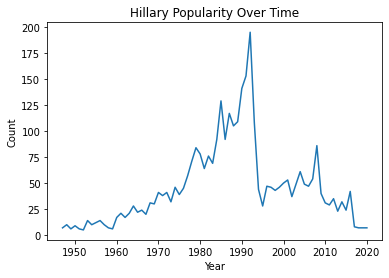

In [131]:
hillary_baby_name = baby_names[(baby_names['Name'] == 'Hillary') & (baby_names['State'] == 'CA') & (baby_names['Sex'] == 'F')]
plt.plot(hillary_baby_name['Year'], hillary_baby_name['Count'])
plt.title("Hillary Popularity Over Time")
plt.xlabel('Year')
plt.ylabel('Count');

The code above is hard coded to generate a dataframe representing the popularity of the female name Hillary in the state of California. While this approach works, it's inelegant.

Here we'll use a more elegant approach that builds a dataframe such that:
1. It contains ALL names.
2. The counts are summed across all 50 states, not just California.

To do this, we use `groupby`, though here we're grouping on **two columns** ("Name" and "Year") instead of just one. After grouping, we use the `sum` aggregation function.

In [132]:
# just run this cell
counts_aggregated_by_name_and_year = baby_names.groupby(["Name", "Year"]).sum()
counts_aggregated_by_name_and_year

Count
Name     Year       
Aaban    2013      6
         2014      6
Aadam    2019      6
Aadan    2008     12
         2009      6
...              ...
Zyriah   2013      7
         2014      6
         2016      5
Zyron    2015      5
Zyshonne 1998      5

[603431 rows x 1 columns]

Note that the resulting DataFrame is multi-indexed, i.e. it has two indices. The outer index is the Name, and the inner index is the Year. 

In order to visualize this data, we'll use `reset_index` in order to set the index back to an integer and transform the Name and Year back into columnar data.

In [133]:
# just run this cell
counts_aggregated_by_name_and_year = counts_aggregated_by_name_and_year.reset_index()
counts_aggregated_by_name_and_year

,Name,Year,Count
0,Aaban,2013,6
1,Aaban,2014,6
2,Aadam,2019,6
3,Aadan,2008,12
4,Aadan,2009,6
...,...,...,...
603426,Zyriah,2013,7
603427,Zyriah,2014,6
603428,Zyriah,2016,5
603429,Zyron,2015,5


Similar to before, we can plot the popularity of a given name by selecting the name we want to visualize. The code below is very similar to the plotting code above, except that we use query to get the name of interest instead of using a boolean array. 

**Note**: Here we use a special syntax `@name_of_interest` to tell the query command to use the python variable `name_of_interest`.

Try out some other names and see what trends you observe. Note that since this is the American social security database, international names are not well represented.

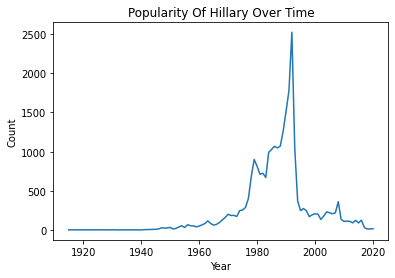

In [134]:
# just run this cell
name_of_interest = 'Hillary'
chosen_baby_name = counts_aggregated_by_name_and_year.query("Name == @name_of_interest")
plt.plot(chosen_baby_name['Year'], chosen_baby_name['Count'])
plt.title(f"Popularity Of {name_of_interest} Over Time")
plt.xlabel('Year')
plt.ylabel('Count');

---

To double-check your work, the cell below will rerun all of the autograder tests.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)